In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [64]:
df = pd.read_csv('UW_Understanding_Business_LOT.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_24868\2736968954.py:1: DtypeWarning: Columns (4,10,11,12,13,14,16,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UW_Understanding_Business_LOT.csv')


In [65]:
df.shape

(1323762, 34)

In [66]:
df.head()

,source_type,TIMESTAMP,COOKIE_ID,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,MARKET_LANGUAGE,CUSTOMER_LOYALTY,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,2023-08-15 18:10:18,90160409479417649411999102181002937619,563,NaN,NaN,SEO,Mobile App,ios 17.3.1,PL_PL,loyal,2023-09-13,2022-11-13,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,2023-08-07 08:07:50,83506423751136985820103526870163297871,72,NaN,NaN,Direct,Mobile App,ios 18.0,PL_PL,return,2023-08-09,2022-11-09,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,2023-07-09 12:27:11,78236612428921115877508527232487027464,95,NaN,NaN,Direct,Mobile App,ios 17.6.1,PL_PL,loyal,2023-07-15,2022-11-20,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,2023-07-20 07:15:18,86513654906858836814951255651058285578,296,NaN,NaN,Direct,Mobile App,ios 17.6.1,PL_PL,loyal,2023-07-25,2022-11-25,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,2023-08-22 05:27:37,07263717780177747617979091720349832062,127,NaN,NaN,Direct,Mobile App,ios 18.0,PL_PL,loyal,2023-08-29,NaN,CPH-RZE,Short Haul,NaN,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
df['PAGE'] = df['PAGE'].fillna(0)
df['PAGE_VIEWS'] = df['PAGE_VIEWS'].fillna(0)
df['STAY_LENGTH'] = df['STAY_LENGTH'].fillna(0)
df['OPERATING_SYSTEMS'] = df['OPERATING_SYSTEMS'].apply(lambda x: x.split(' ')[0])

In [68]:
df.head()

,source_type,TIMESTAMP,COOKIE_ID,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,MARKET_LANGUAGE,CUSTOMER_LOYALTY,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,2023-08-15 18:10:18,90160409479417649411999102181002937619,563,0,0.0,SEO,Mobile App,ios,PL_PL,loyal,2023-09-13,2022-11-13,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,2023-08-07 08:07:50,83506423751136985820103526870163297871,72,0,0.0,Direct,Mobile App,ios,PL_PL,return,2023-08-09,2022-11-09,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,2023-07-09 12:27:11,78236612428921115877508527232487027464,95,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-07-15,2022-11-20,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,2023-07-20 07:15:18,86513654906858836814951255651058285578,296,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-07-25,2022-11-25,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,2023-08-22 05:27:37,07263717780177747617979091720349832062,127,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-08-29,NaN,CPH-RZE,Short Haul,0.0,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323762 entries, 0 to 1323761
Data columns (total 34 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   source_type                   1323762 non-null  object 
 1   TIMESTAMP                     1182159 non-null  object 
 2   COOKIE_ID                     1323762 non-null  object 
 3   VISIT_NUMBER                  1323762 non-null  int64  
 4   PAGE                          1323762 non-null  object 
 5   PAGE_VIEWS                    1323762 non-null  float64
 6   MARKETING_CHANNEL             1323762 non-null  object 
 7   PLATFORM_TYPE                 1323762 non-null  object 
 8   OPERATING_SYSTEMS             1323762 non-null  object 
 9   MARKET_LANGUAGE               1323490 non-null  object 
 10  CUSTOMER_LOYALTY              35879 non-null    object 
 11  DEPARTURE_DATE                35590 non-null    object 
 12  ARRIVAL_DATE                

In [70]:
categorical_cols = [
    'source_type', 'MARKETING_CHANNEL', 'PLATFORM_TYPE', 'ORIGIN_AND_DESTINATION_PORTS',
    'OPERATING_SYSTEMS', 'CUSTOMER_LOYALTY', 'FLIGHT_TYPE',
    'CLASS_TYPE', 'FARE_FAMILY', 'RANGE', 'FLOW_TYPE'
]

numerical_cols = [
    'VISIT_NUMBER', 'PAGE', 'PAGE_VIEWS',
    'STAY_LENGTH', 'NUMBER_OF_SEGMENTS', 'DAYS_TO_DEPARTURE',
    'ADULTS', 'TEENS', 'CHILDS',
    'INFANTS', 'BOOKING_CONFIRMATION', 'BOOKING_CHANGE_CONFIRMATION'
]
# numerical_cols = ['DAYS_TO_DEPARTURE', 'NUMBER_OF_SEGMENTS']
# numerical_cols = [col for col in df.columns if col not in categorical_cols and df[col].dtype in ['int64', 'float64']]

exclude_cols = ['COOKIE_ID', 'TIMESTAMP', 'MARKET_LANGUAGE', 'DEPARTURE_DATE', 'ARRIVAL_DATE']

ancillaries = [
    'PAID_SEATS', 'ONBOARD_MEALS', 
    'EXTRA_BAGGAGE', 'BUSINESS_LOUNGE', 
    'SPECIAL_EQUIPMENT', 'FAST_TRACK'
]

In [71]:
numerical_cols = [col for col in df.columns if col not in categorical_cols+ancillaries and pd.api.types.is_numeric_dtype(df[col])]

In [72]:
numerical_cols

['VISIT_NUMBER',
 'PAGE_VIEWS',
 'STAY_LENGTH',
 'NUMBER_OF_SEGMENTS',
 'DAYS_TO_DEPARTURE',
 'ADULTS',
 'TEENS',
 'CHILDS',
 'INFANTS',
 'BOOKING_CONFIRMATION',
 'BOOKING_CHANGE_CONFIRMATION']

In [73]:
# df.loc[:, ~df.columns.isin(exclude_cols)] = df.loc[:, ~df.columns.isin(exclude_cols)].fillna(0)
df = df.loc[:, ~df.columns.isin(exclude_cols)]

In [74]:
df.source_type.unique()

array(['TRANSACTION', 'ACTIVITY'], dtype=object)

In [75]:
df.head(20).to_csv('Sample_UW_Understanding_Business_LOT_head.csv', index=False)

In [76]:
# Check basic statistics of the dataset
eda_summary = df.describe(include='all')
eda_summary.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_type,1323762,2,ACTIVITY,1287883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VISIT_NUMBER,1323762.0,NaN,NaN,NaN,97.58109,187.40431,1.0,5.0,24.0,100.0,1794.0
PAGE,1323762,13081,www.lot.com/pl/pl/book/availability/departure,104049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAGE_VIEWS,1323762.0,NaN,NaN,NaN,0.977701,0.211543,0.0,1.0,1.0,1.0,25.0
MARKETING_CHANNEL,1323762,9,Direct,399506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLATFORM_TYPE,1323762,3,Regular Web,845914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OPERATING_SYSTEMS,1323762,7,windows,651813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_LOYALTY,35879,3,loyal,17728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_AND_DESTINATION_PORTS,35599,2625,WAW-LHR,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RANGE,35591,3,Short Haul,25354,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
na_values = df.isna().sum()
na_values[na_values > 0].sort_values(ascending=False)

NUMBER_OF_SEGMENTS              1288173
DAYS_TO_DEPARTURE               1288172
RANGE                           1288171
FLIGHT_TYPE                     1288171
ORIGIN_AND_DESTINATION_PORTS    1288163
CUSTOMER_LOYALTY                1287883
PAID_SEATS                      1287883
BOOKING_CONFIRMATION            1287883
FAST_TRACK                      1287883
SPECIAL_EQUIPMENT               1287883
BUSINESS_LOUNGE                 1287883
EXTRA_BAGGAGE                   1287883
ONBOARD_MEALS                   1287883
CLASS_TYPE                      1287883
FLOW_TYPE                       1287883
FARE_FAMILY                     1287883
INFANTS                         1287883
CHILDS                          1287883
TEENS                           1287883
ADULTS                          1287883
BOOKING_CHANGE_CONFIRMATION     1287883
dtype: int64

In [78]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

NUMBER_OF_SEGMENTS              1288173
DAYS_TO_DEPARTURE               1288172
RANGE                           1288171
FLIGHT_TYPE                     1288171
ORIGIN_AND_DESTINATION_PORTS    1288163
CUSTOMER_LOYALTY                1287883
PAID_SEATS                      1287883
BOOKING_CONFIRMATION            1287883
FAST_TRACK                      1287883
SPECIAL_EQUIPMENT               1287883
BUSINESS_LOUNGE                 1287883
EXTRA_BAGGAGE                   1287883
ONBOARD_MEALS                   1287883
CLASS_TYPE                      1287883
FLOW_TYPE                       1287883
FARE_FAMILY                     1287883
INFANTS                         1287883
CHILDS                          1287883
TEENS                           1287883
ADULTS                          1287883
BOOKING_CHANGE_CONFIRMATION     1287883
dtype: int64

In [79]:
df.MARKETING_CHANNEL.unique()

array(['SEO', 'Direct', 'Social Media', 'SEM', 'Email', 'Remarketing',
       'Programmatic', 'Display', 'QR Code'], dtype=object)

In [80]:
for dtype in df.dtypes:
    if dtype == 'object':
        print(df.select_dtypes(include=[dtype]).nunique())

source_type                         2
PAGE                            13081
MARKETING_CHANNEL                   9
PLATFORM_TYPE                       3
OPERATING_SYSTEMS                   7
CUSTOMER_LOYALTY                    3
ORIGIN_AND_DESTINATION_PORTS     2625
RANGE                               3
FLIGHT_TYPE                         3
CLASS_TYPE                          3
FARE_FAMILY                         3
FLOW_TYPE                           2
dtype: int64
source_type                         2
PAGE                            13081
MARKETING_CHANNEL                   9
PLATFORM_TYPE                       3
OPERATING_SYSTEMS                   7
CUSTOMER_LOYALTY                    3
ORIGIN_AND_DESTINATION_PORTS     2625
RANGE                               3
FLIGHT_TYPE                         3
CLASS_TYPE                          3
FARE_FAMILY                         3
FLOW_TYPE                           2
dtype: int64
source_type                         2
PAGE                    

In [81]:
# Check for class imbalance in the target columns
ancillary_class_distribution = df[ancillaries].mean()
ancillary_class_distribution.sort_values(ascending=False)

PAID_SEATS           28.478985
EXTRA_BAGGAGE        13.158268
SPECIAL_EQUIPMENT     0.816341
FAST_TRACK            0.626396
ONBOARD_MEALS         0.581447
BUSINESS_LOUNGE       0.229430
dtype: float64

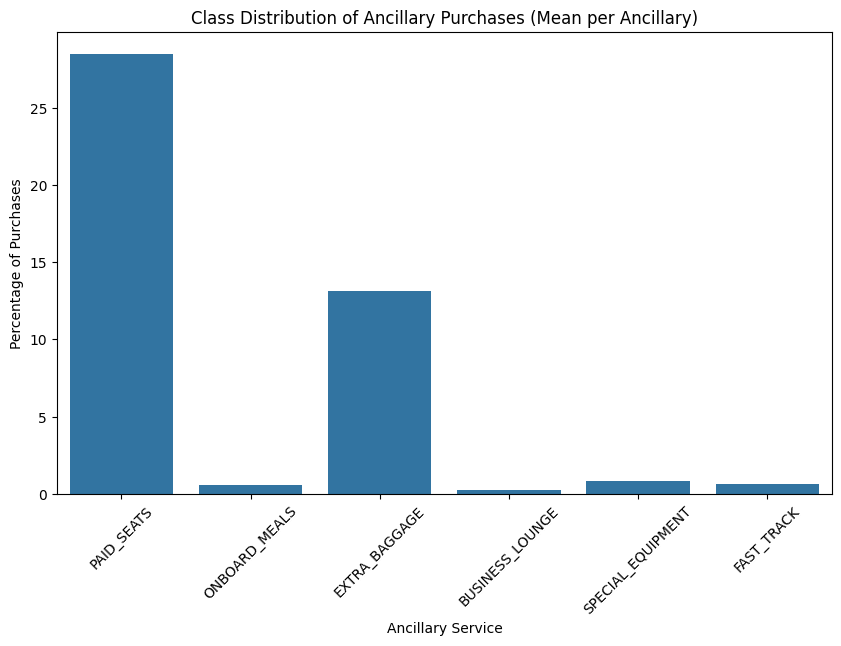

In [82]:
# Visualize the class distribution of target variables
plt.figure(figsize=(10, 6))
sns.barplot(x=ancillary_class_distribution.index, y=ancillary_class_distribution.values)
plt.title('Class Distribution of Ancillary Purchases (Mean per Ancillary)')
plt.ylabel('Percentage of Purchases')
plt.xlabel('Ancillary Service')
plt.xticks(rotation=45)
plt.show()

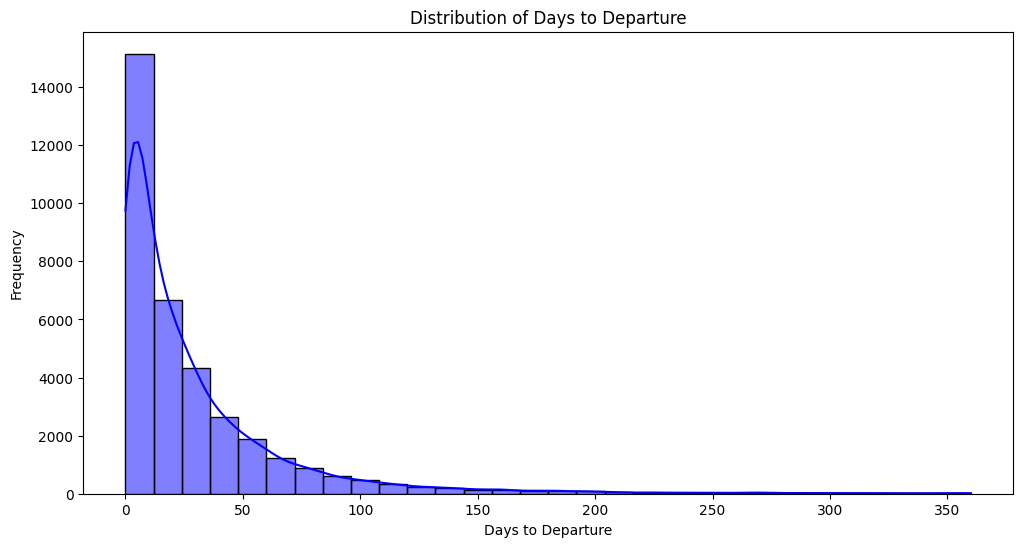

In [83]:
# Visualize the distribution of some important features
plt.figure(figsize=(12, 6))
sns.histplot(df['DAYS_TO_DEPARTURE'], kde=True, color='blue', bins=30)
plt.title('Distribution of Days to Departure')
plt.xlabel('Days to Departure')
plt.ylabel('Frequency')
plt.show()


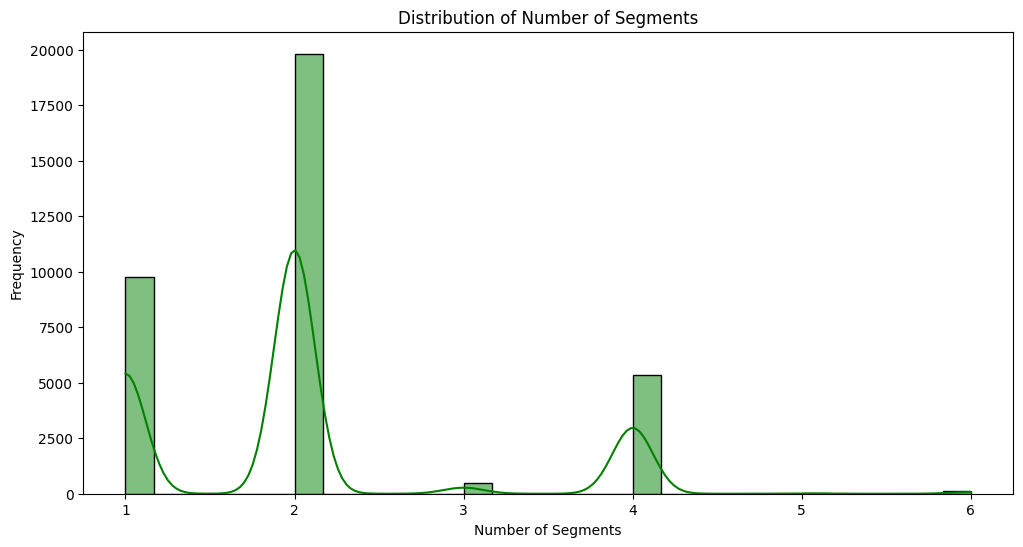

In [84]:
plt.figure(figsize=(12, 6))
sns.histplot(df['NUMBER_OF_SEGMENTS'], kde=True, color='green', bins=30)
plt.title('Distribution of Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Frequency')
plt.show()

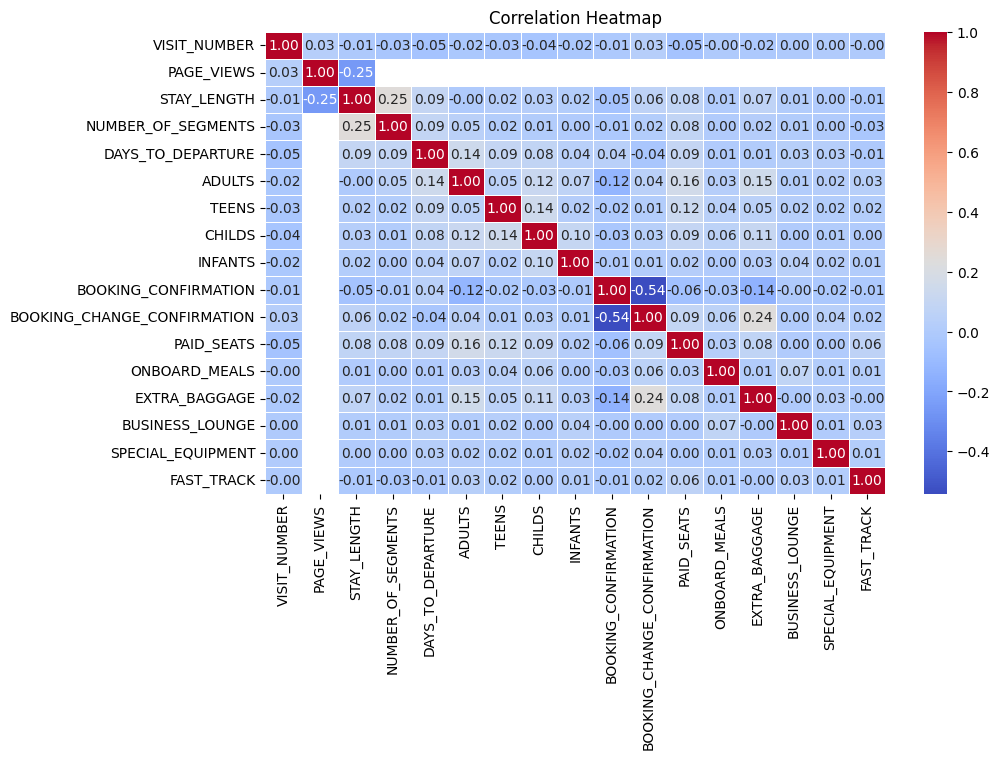

In [85]:
# Visualizing correlations with heatmap
corr = df[numerical_cols + ancillaries].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Handling Missing Values

In [87]:
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [88]:
df.STAY_LENGTH.unique()

array([  1.,   7.,   2.,   0.,   3.,   5.,   8.,   4.,   6.,  22.,  11.,
        17.,   9.,  14.,  13.,  10.,  18.,  47.,  15.,  23.,  21.,  16.,
        39.,  27.,  12.,  31.,  28.,  25.,  80.,  48., 100.,  19.,  70.,
        30.,  29.,  35.,  26.,  37.,  24., 111.,  34.,  33.,  53., 147.,
        66.,  32.,  20.,  36., 163.,  42.,  99.,  38.,  62.,  41.,  88.,
       139., 141., 193.,  67.,  71., 128.,  60.,  52.,  78.,  40.,  84.,
       103.,  69.,  68.,  49., 126.,  54.,  45., 151.,  56.,  59.,  87.,
        81.,  76.,  73.,  44., 106., 108.,  63., 175., 129.,  77., 179.,
        95., 143., 114., 104., 154.,  72., 277., 201.,  50.,  86.,  93.,
        55., 173., 156.,  43., 259., 113., 166., 284.,  90.,  91.,  83.,
        57.,  79.,  96., 314., 135., 218.,  65.,  89., 162., 188., 186.,
       301., 280.,  46., 119.,  98.,  51.,  58., 167.,  82., 142.,  74.,
       248., 171., 190.,  64., 117.,  61., 182., 204., 101., 109., 196.,
       136.,  85., 181., 124.,  92., 105., 249., 11

In [89]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [90]:
cleaned_df = df.dropna(subset=ancillaries)

In [91]:
cleaned_df.shape

(35879, 29)

In [92]:
cleaned_df.head()

,source_type,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,563,0,0.0,SEO,Mobile App,ios,loyal,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,72,0,0.0,Direct,Mobile App,ios,return,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,95,0,0.0,Direct,Mobile App,ios,loyal,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,296,0,0.0,Direct,Mobile App,ios,loyal,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,127,0,0.0,Direct,Mobile App,ios,loyal,CPH-RZE,Short Haul,0.0,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Label encode categorical columns

In [93]:
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

C:\Users\User\AppData\Local\Temp\ipykernel_24868\315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
C:\Users\User\AppData\Local\Temp\ipykernel_24868\315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
C:\Users\User\AppData\Local\Temp\ipykernel_24868\315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [94]:
cleaned_df.head()

,source_type,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,0,563,0,0.0,6,0,2,0,2327,2,1.0,2,2.0,28.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,72,0,0.0,0,0,2,2,689,0,1.0,2,4.0,1.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,95,0,0.0,0,0,2,0,1660,2,7.0,2,2.0,5.0,1.0,0.0,0.0,0.0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,296,0,0.0,0,0,2,0,2520,0,2.0,2,2.0,4.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,127,0,0.0,0,0,2,0,459,2,0.0,1,2.0,6.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
scaler = StandardScaler()
cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])

C:\Users\User\AppData\Local\Temp\ipykernel_24868\2931327204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])


In [96]:
# Prepare features (X) and targets (y)
X = cleaned_df[categorical_cols + numerical_cols]
y = cleaned_df[ancillaries]

In [97]:
X.head()

,source_type,MARKETING_CHANNEL,PLATFORM_TYPE,ORIGIN_AND_DESTINATION_PORTS,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,FLIGHT_TYPE,CLASS_TYPE,FARE_FAMILY,RANGE,FLOW_TYPE,VISIT_NUMBER,PAGE_VIEWS,STAY_LENGTH,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,0,6,0,2327,2,0,2,1,1,2,1,3.204545,0.0,-0.292775,-0.057840,-0.036159,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
1,0,0,0,689,2,2,2,1,1,0,1,0.010855,0.0,-0.292775,1.999904,-0.690291,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
2,0,0,0,1660,2,0,2,1,2,2,1,0.160457,0.0,0.065033,-0.057840,-0.593383,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
3,0,0,0,2520,2,0,2,1,1,0,1,1.467854,0.0,-0.233140,-0.057840,-0.617610,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
4,0,0,0,459,2,0,1,1,1,2,1,0.368600,0.0,-0.352409,-0.057840,-0.569156,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912


In [98]:
y.head()

,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


## Split into Train, Validation, and Test sets

In [105]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Feature Selection

#### Permutation Importance

In [118]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import matplotlib.pyplot as plt

##### Mutual Information 

In [185]:
def run_mutual_info_for_all_targets(X_train, y_train_df):

    mi_results = pd.DataFrame(index=X_train.columns)

    for target in y_train_df.columns:
        print(f"Mutual Information for: {target}")
        y_target = (y_train_df[target] > 0).astype(int)
        mi = mutual_info_classif(X_train, y_target, random_state=42)
        mi_results[target] = mi

    return mi_results

In [187]:
df_mutual_info = run_mutual_info_for_all_targets(X_train, y_train)

Mutual Information for: PAID_SEATS
Mutual Information for: ONBOARD_MEALS
Mutual Information for: EXTRA_BAGGAGE
Mutual Information for: BUSINESS_LOUNGE
Mutual Information for: SPECIAL_EQUIPMENT
Mutual Information for: FAST_TRACK


In [189]:
df_mutual_info['EXTRA_BAGGAGE'].sort_values(ascending=False).head(20)

FLOW_TYPE                       0.037576
BOOKING_CHANGE_CONFIRMATION     0.032683
BOOKING_CONFIRMATION            0.031461
RANGE                           0.011989
ORIGIN_AND_DESTINATION_PORTS    0.011966
ADULTS                          0.008768
CLASS_TYPE                      0.005714
STAY_LENGTH                     0.005237
PLATFORM_TYPE                   0.004747
CHILDS                          0.004739
OPERATING_SYSTEMS               0.004183
DAYS_TO_DEPARTURE               0.004155
FARE_FAMILY                     0.003734
TEENS                           0.003430
CUSTOMER_LOYALTY                0.001927
FLIGHT_TYPE                     0.001861
VISIT_NUMBER                    0.001317
NUMBER_OF_SEGMENTS              0.001016
INFANTS                         0.000777
MARKETING_CHANNEL               0.000733
Name: EXTRA_BAGGAGE, dtype: float64

In [190]:
df_mutual_info.median(axis=1).sort_values(ascending=False).head(20)

FLOW_TYPE                       0.007043
CLASS_TYPE                      0.006131
RANGE                           0.004590
PLATFORM_TYPE                   0.004354
ORIGIN_AND_DESTINATION_PORTS    0.004354
FARE_FAMILY                     0.002665
OPERATING_SYSTEMS               0.002169
FLIGHT_TYPE                     0.002006
MARKETING_CHANNEL               0.001910
BOOKING_CONFIRMATION            0.001884
BOOKING_CHANGE_CONFIRMATION     0.001684
ADULTS                          0.001525
TEENS                           0.001405
CUSTOMER_LOYALTY                0.001347
VISIT_NUMBER                    0.001014
CHILDS                          0.000994
NUMBER_OF_SEGMENTS              0.000938
DAYS_TO_DEPARTURE               0.000880
STAY_LENGTH                     0.000853
INFANTS                         0.000722
dtype: float64

##### Permutation Importance of Random Forest and XGBoost (based on MedianScore)

In [176]:
def multi_model_feature_selection_custom_split(X_train, y_train, X_val, y_val, top_n=20, random_state=42):
    scores = pd.DataFrame(index=X_train.columns)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=200, random_state=random_state)
    rf.fit(X_train, y_train)

    # XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=random_state)
    xgb_model.fit(X_train, y_train)

    # Mutual Information 
    # mi = mutual_info_classif(X_train, y_train, random_state=random_state)
    # scores['MutualInformation'] = mi

    # Permutation Importance (for validation set)
    rf_perm = permutation_importance(rf, X_val, y_val, n_repeats=10, random_state=random_state, n_jobs=-1)
    xgb_perm = permutation_importance(xgb_model, X_val, y_val, n_repeats=10, random_state=random_state, n_jobs=-1)

    scores['RF_PermutationImportance'] = rf_perm.importances_mean
    scores['XGB_PermutationImportance'] = xgb_perm.importances_mean

    # scores['MeanScore'] = scores.mean(axis=1)
    # selected_features = scores.sort_values(by='MeanScore', ascending=False).head(top_n).index.tolist()
    scores['MedianScore'] = scores.median(axis=1)
    selected_features = scores.sort_values(by='MedianScore', ascending=False).head(top_n).index.tolist()


    return selected_features, scores.sort_values(by='MedianScore', ascending=False)

In [177]:
target_name = 'EXTRA_BAGGAGE'

y_train_target = (y_train[target_name] > 0).astype(int)
y_val_target = (y_val[target_name] > 0).astype(int)

In [178]:
selected_features, feature_scores = multi_model_feature_selection_custom_split(
    X_train, y_train_target, X_val, y_val_target, top_n=20
)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [179]:
selected_features

['BOOKING_CHANGE_CONFIRMATION',
 'STAY_LENGTH',
 'DAYS_TO_DEPARTURE',
 'VISIT_NUMBER',
 'FARE_FAMILY',
 'MARKETING_CHANNEL',
 'ORIGIN_AND_DESTINATION_PORTS',
 'OPERATING_SYSTEMS',
 'FLOW_TYPE',
 'ADULTS',
 'CUSTOMER_LOYALTY',
 'RANGE',
 'FLIGHT_TYPE',
 'PLATFORM_TYPE',
 'NUMBER_OF_SEGMENTS',
 'BOOKING_CONFIRMATION',
 'INFANTS',
 'CLASS_TYPE',
 'PAGE_VIEWS',
 'source_type']

In [180]:
def run_feature_selection_for_all_targets(X_train, y_train_df, X_val, y_val_df, top_n=20):
    all_selected_features = {}
    all_scores = {}

    for target_name in y_train_df.columns:
        print(f"\n Running feature selection for: {target_name}")

        # Filter and binarize target for current service
        y_train_target = (y_train_df[target_name] > 0).astype(int)
        y_val_target = (y_val_df[target_name] > 0).astype(int)

        # Run feature selection
        selected_features, feature_scores = multi_model_feature_selection_custom_split(
            X_train, y_train_target, X_val, y_val_target, top_n=top_n
        )

        # Store results
        all_selected_features[target_name] = selected_features
        all_scores[target_name] = feature_scores

    return all_selected_features, all_scores

In [181]:
selected_features_dict, feature_scores_dict = run_feature_selection_for_all_targets(
    X_train, y_train, X_val, y_val, top_n=20
)



 Running feature selection for: PAID_SEATS


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:21:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Running feature selection for: ONBOARD_MEALS


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:21:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Running feature selection for: EXTRA_BAGGAGE


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:21:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Running feature selection for: BUSINESS_LOUNGE


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Running feature selection for: SPECIAL_EQUIPMENT


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Running feature selection for: FAST_TRACK


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [182]:
feature_scores_dict

{'PAID_SEATS':                               RF_PermutationImportance  \
 MARKETING_CHANNEL                             0.008993   
 VISIT_NUMBER                                  0.007414   
 DAYS_TO_DEPARTURE                             0.005072   
 ORIGIN_AND_DESTINATION_PORTS                  0.004998   
 STAY_LENGTH                                   0.002081   
 RANGE                                         0.004218   
 FARE_FAMILY                                   0.003865   
 OPERATING_SYSTEMS                             0.002750   
 NUMBER_OF_SEGMENTS                            0.002025   
 BOOKING_CHANGE_CONFIRMATION                   0.000334   
 TEENS                                         0.000539   
 ADULTS                                        0.002490   
 CLASS_TYPE                                    0.000390   
 FLIGHT_TYPE                                  -0.000130   
 FLOW_TYPE                                     0.000297   
 PLATFORM_TYPE                            

In [192]:
top_median_features = {}

for target, df in feature_scores_dict.items():
    if 'MedianScore' in df.columns:
        top_median_features[target] = df.sort_values(by='MedianScore', ascending=False).head(20)

In [195]:
for target, df in top_median_features.items():
    print(f"\n Top 20 features based on MedianScore for: {target}")
    display(df) 



 Top 20 features based on MedianScore for: PAID_SEATS


,RF_PermutationImportance,XGB_PermutationImportance,MedianScore
MARKETING_CHANNEL,0.008993,0.004571,0.006782
VISIT_NUMBER,0.007414,0.006001,0.006708
DAYS_TO_DEPARTURE,0.005072,0.006224,0.005648
ORIGIN_AND_DESTINATION_PORTS,0.004998,0.005667,0.005333
STAY_LENGTH,0.002081,0.007860,0.004970
RANGE,0.004218,0.002676,0.003447
FARE_FAMILY,0.003865,0.001282,0.002573
OPERATING_SYSTEMS,0.002750,0.001932,0.002341
NUMBER_OF_SEGMENTS,0.002025,0.002174,0.002100
BOOKING_CHANGE_CONFIRMATION,0.000334,0.003567,0.001951



 Top 20 features based on MedianScore for: ONBOARD_MEALS


,RF_PermutationImportance,XGB_PermutationImportance,MedianScore
VISIT_NUMBER,0.000000,1.858045e-04,0.000093
CUSTOMER_LOYALTY,0.000000,1.672241e-04,0.000084
OPERATING_SYSTEMS,0.000000,1.300632e-04,0.000065
FLOW_TYPE,0.000000,9.290227e-05,0.000046
STAY_LENGTH,0.000000,9.290227e-05,0.000046
DAYS_TO_DEPARTURE,-0.000037,1.114827e-04,0.000037
ORIGIN_AND_DESTINATION_PORTS,-0.000056,1.300632e-04,0.000037
ADULTS,0.000000,5.574136e-05,0.000028
TEENS,0.000000,3.716091e-05,0.000019
FARE_FAMILY,0.000019,1.110223e-17,0.000009



 Top 20 features based on MedianScore for: EXTRA_BAGGAGE


,RF_PermutationImportance,XGB_PermutationImportance,MedianScore
BOOKING_CHANGE_CONFIRMATION,0.004812,0.014530,0.009671
STAY_LENGTH,0.003623,0.004515,0.004069
DAYS_TO_DEPARTURE,0.005277,0.002546,0.003911
VISIT_NUMBER,0.002174,0.004682,0.003428
FARE_FAMILY,0.002211,0.003270,0.002741
MARKETING_CHANNEL,0.002638,0.000948,0.001793
ORIGIN_AND_DESTINATION_PORTS,0.002118,0.000762,0.001440
OPERATING_SYSTEMS,0.001319,0.000427,0.000873
FLOW_TYPE,0.001319,0.000409,0.000864
ADULTS,0.001486,0.000186,0.000836



 Top 20 features based on MedianScore for: BUSINESS_LOUNGE


,RF_PermutationImportance,XGB_PermutationImportance,MedianScore
INFANTS,0.000186,0.000186,0.000186
TEENS,0.000186,0.000186,0.000186
DAYS_TO_DEPARTURE,0.000149,0.000056,0.000102
NUMBER_OF_SEGMENTS,0.000000,0.000093,0.000046
ADULTS,0.000000,0.000074,0.000037
MARKETING_CHANNEL,0.000000,0.000037,0.000019
CLASS_TYPE,0.000000,0.000019,0.000009
OPERATING_SYSTEMS,0.000000,0.000000,0.000000
CUSTOMER_LOYALTY,0.000000,0.000000,0.000000
FLIGHT_TYPE,0.000000,0.000000,0.000000



 Top 20 features based on MedianScore for: SPECIAL_EQUIPMENT


,RF_PermutationImportance,XGB_PermutationImportance,MedianScore
FARE_FAMILY,0.000074,0.000111,0.000093
CLASS_TYPE,0.000000,0.000000,0.000000
BOOKING_CONFIRMATION,0.000000,0.000000,0.000000
CHILDS,0.000000,0.000000,0.000000
TEENS,0.000000,0.000000,0.000000
PAGE_VIEWS,0.000000,0.000000,0.000000
BOOKING_CHANGE_CONFIRMATION,0.000000,0.000000,0.000000
PLATFORM_TYPE,0.000000,0.000000,0.000000
source_type,0.000000,0.000000,0.000000
FLOW_TYPE,0.000000,-0.000019,-0.000009



 Top 20 features based on MedianScore for: FAST_TRACK


,RF_PermutationImportance,XGB_PermutationImportance,MedianScore
MARKETING_CHANNEL,0.000465,0.000632,0.000548
ORIGIN_AND_DESTINATION_PORTS,0.000539,0.000242,0.000390
FARE_FAMILY,0.000186,0.000502,0.000344
VISIT_NUMBER,0.000465,0.000167,0.000316
ADULTS,0.000390,0.000111,0.000251
NUMBER_OF_SEGMENTS,0.000446,0.000037,0.000242
BOOKING_CONFIRMATION,0.000390,0.000000,0.000195
INFANTS,0.000186,0.000204,0.000195
FLIGHT_TYPE,0.000204,0.000167,0.000186
TEENS,0.000186,0.000186,0.000186


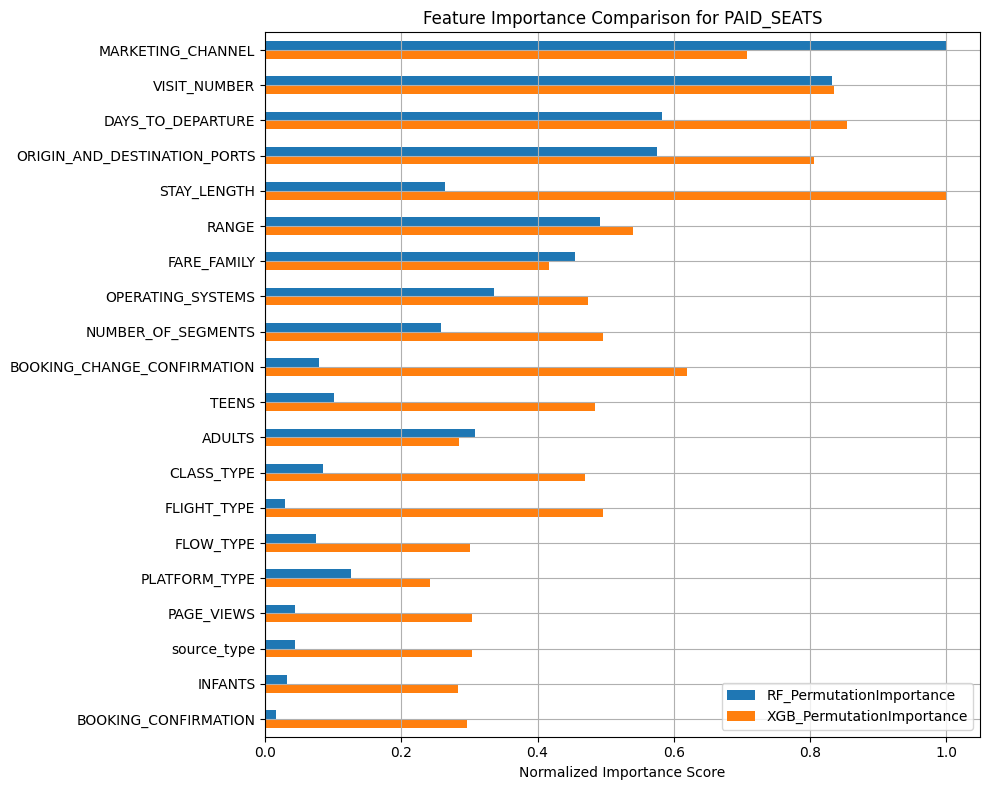

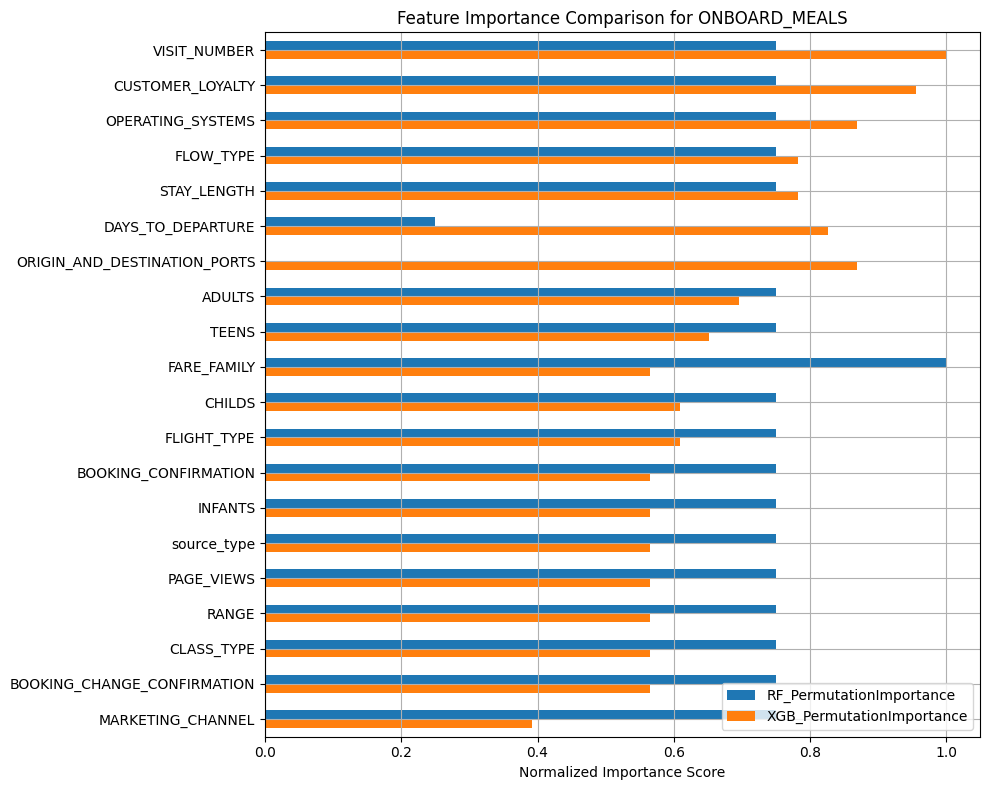

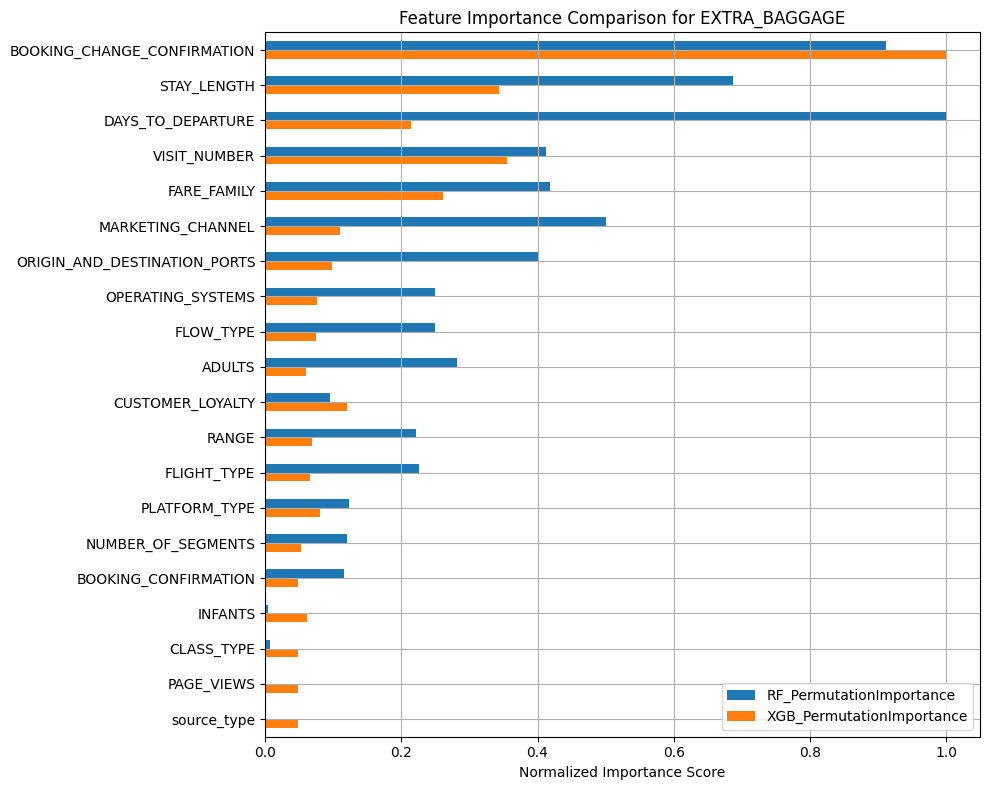

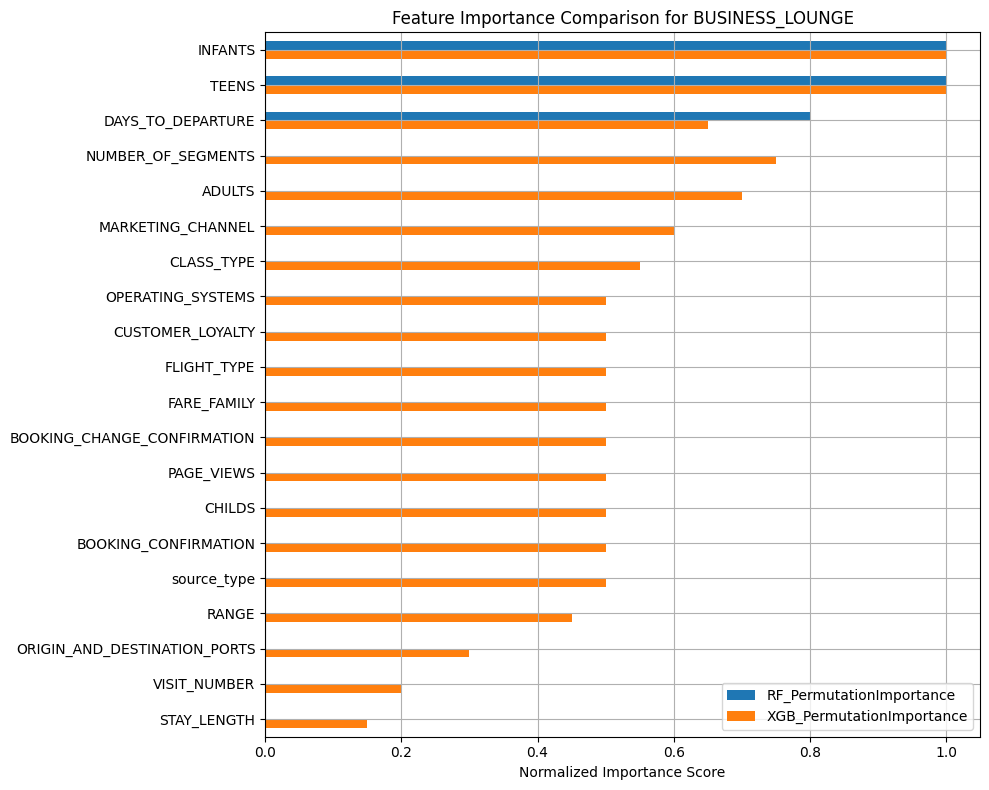

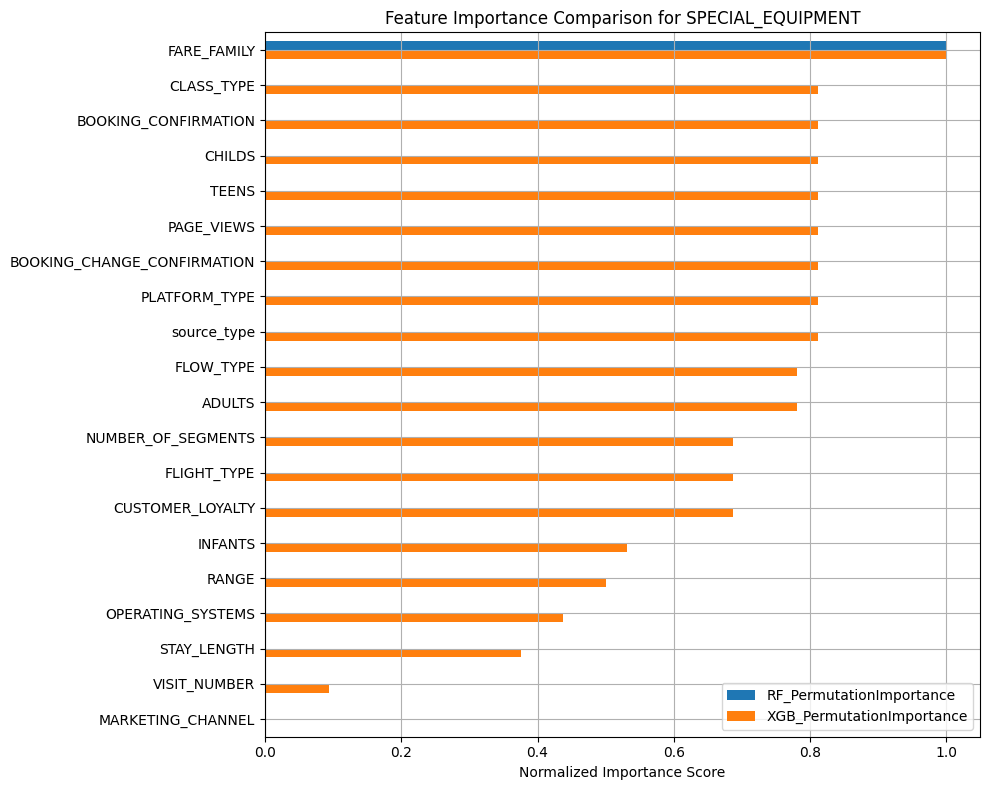

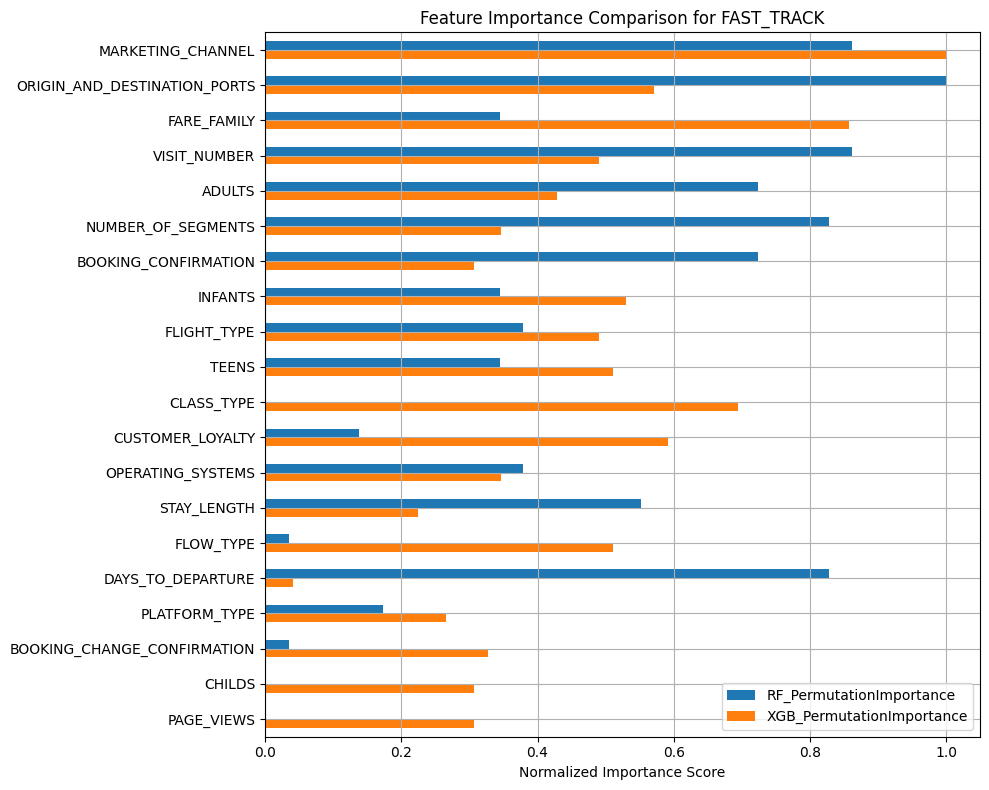

In [184]:
def plot_normalized_feature_importance(all_scores_dict, top_n=20):

    for target, scores_df in all_scores_dict.items():
        # 'MutualInformation'
        cols = ['RF_PermutationImportance', 'XGB_PermutationImportance']
        normalized = scores_df[cols].copy()
        normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())

        # Топ-N 
        top_features = scores_df.sort_values('MedianScore', ascending=False).head(top_n).index

        normalized.loc[top_features].plot(kind='barh', figsize=(10, 8))
        plt.title(f'Feature Importance Comparison for {target}')
        plt.xlabel('Normalized Importance Score')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

plot_normalized_feature_importance(feature_scores_dict)

In [196]:
# Combine all top features from different targets
all_top_features = set()

for df in top_median_features.values():
    all_top_features.update(df.index)

all_top_features = sorted(all_top_features)

In [200]:
print(f" Total number of features: {len(all_top_features)}")
print(all_top_features)

 Total number of features: 22
['ADULTS', 'BOOKING_CHANGE_CONFIRMATION', 'BOOKING_CONFIRMATION', 'CHILDS', 'CLASS_TYPE', 'CUSTOMER_LOYALTY', 'DAYS_TO_DEPARTURE', 'FARE_FAMILY', 'FLIGHT_TYPE', 'FLOW_TYPE', 'INFANTS', 'MARKETING_CHANNEL', 'NUMBER_OF_SEGMENTS', 'OPERATING_SYSTEMS', 'ORIGIN_AND_DESTINATION_PORTS', 'PAGE_VIEWS', 'PLATFORM_TYPE', 'RANGE', 'STAY_LENGTH', 'TEENS', 'VISIT_NUMBER', 'source_type']


#### Recursive feature elimination

##### Trial version of RFE

In [121]:
from sklearn.feature_selection import RFE

In [122]:
def run_recursive_feature_elimination(X_train, y_train, estimator=None, n_features_to_select=20):
    
    if estimator is None:
        estimator = RandomForestClassifier(n_estimators=200, random_state=42)

    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    selected_features = X_train.columns[rfe.support_]
    ranking = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()

    return selected_features.tolist(), ranking

In [136]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [137]:
y_train_rfe = (y_train['EXTRA_BAGGAGE'] > 0).astype(int)

selected_rfe_features_rf, feature_ranking_rf = run_recursive_feature_elimination(X_train, y_train_rfe, n_features_to_select=20)

In [139]:
selected_rfe_features_xgb, feature_ranking_xgb = run_recursive_feature_elimination(
    X_train,
    y_train_target,
    estimator=xgb_model,
    n_features_to_select=20
)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:15:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:15:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

In [141]:
feature_ranking_rf

FLOW_TYPE                       1
INFANTS                         1
CHILDS                          1
TEENS                           1
ADULTS                          1
DAYS_TO_DEPARTURE               1
NUMBER_OF_SEGMENTS              1
STAY_LENGTH                     1
VISIT_NUMBER                    1
BOOKING_CONFIRMATION            1
BOOKING_CHANGE_CONFIRMATION     1
FARE_FAMILY                     1
CLASS_TYPE                      1
FLIGHT_TYPE                     1
CUSTOMER_LOYALTY                1
OPERATING_SYSTEMS               1
ORIGIN_AND_DESTINATION_PORTS    1
PLATFORM_TYPE                   1
MARKETING_CHANNEL               1
RANGE                           1
PAGE_VIEWS                      2
source_type                     3
dtype: int32

In [142]:
feature_ranking_xgb 

FLOW_TYPE                       1
INFANTS                         1
CHILDS                          1
TEENS                           1
ADULTS                          1
DAYS_TO_DEPARTURE               1
NUMBER_OF_SEGMENTS              1
STAY_LENGTH                     1
VISIT_NUMBER                    1
BOOKING_CONFIRMATION            1
BOOKING_CHANGE_CONFIRMATION     1
FARE_FAMILY                     1
CLASS_TYPE                      1
FLIGHT_TYPE                     1
CUSTOMER_LOYALTY                1
OPERATING_SYSTEMS               1
ORIGIN_AND_DESTINATION_PORTS    1
PLATFORM_TYPE                   1
MARKETING_CHANNEL               1
RANGE                           1
PAGE_VIEWS                      2
source_type                     3
dtype: int32

##### **RFE code for all target variables (Random Forest, XGBoost)**

In [145]:
def run_simple_rfe_for_all_targets(X_train, y_train_df, n_features_to_select=20):

    rfe_selected_features = {}

    for target in y_train_df.columns:
        print(f"Running RFE for target: {target}")

        y_target = (y_train_df[target] > 0).astype(int)

        # --- Random Forest ---
        rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
        rfe_rf = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)
        rfe_rf.fit(X_train, y_target)
        rf_selected = X_train.columns[rfe_rf.support_]

        # --- XGBoost ---
        xgb_model = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
        rfe_xgb = RFE(estimator=xgb_model, n_features_to_select=n_features_to_select)
        rfe_xgb.fit(X_train, y_target)
        xgb_selected = X_train.columns[rfe_xgb.support_]

        rfe_selected_features[target] = {
            'rf_selected': rf_selected.tolist(),
            'xgb_selected': xgb_selected.tolist()
        }

    return rfe_selected_features

In [146]:
rfe_selected = run_simple_rfe_for_all_targets(X_train, y_train, n_features_to_select=20)

Running simplified RFE for target: PAID_SEATS


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Running simplified RFE for target: ONBOARD_MEALS


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Running simplified RFE for target: EXTRA_BAGGAGE


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Running simplified RFE for target: BUSINESS_LOUNGE


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Running simplified RFE for target: SPECIAL_EQUIPMENT


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Running simplified RFE for target: FAST_TRACK


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:24:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

In [155]:
rfe_selected['EXTRA_BAGGAGE']['rf_selected']

['MARKETING_CHANNEL',
 'PLATFORM_TYPE',
 'ORIGIN_AND_DESTINATION_PORTS',
 'OPERATING_SYSTEMS',
 'CUSTOMER_LOYALTY',
 'FLIGHT_TYPE',
 'CLASS_TYPE',
 'FARE_FAMILY',
 'RANGE',
 'FLOW_TYPE',
 'VISIT_NUMBER',
 'STAY_LENGTH',
 'NUMBER_OF_SEGMENTS',
 'DAYS_TO_DEPARTURE',
 'ADULTS',
 'TEENS',
 'CHILDS',
 'INFANTS',
 'BOOKING_CONFIRMATION',
 'BOOKING_CHANGE_CONFIRMATION']

In [156]:
def rfe_selected_to_dataframe(rfe_selected_dict):

    all_features = set()
    for target_data in rfe_selected_dict.values():
        all_features.update(target_data['rf_selected'])
        all_features.update(target_data['xgb_selected'])

    df = pd.DataFrame(index=sorted(all_features))

    for target, selections in rfe_selected_dict.items():
        rf_set = set(selections['rf_selected'])
        xgb_set = set(selections['xgb_selected'])

        df[f'{target}_RF'] = df.index.map(lambda f: 1 if f in rf_set else 0)
        df[f'{target}_XGB'] = df.index.map(lambda f: 1 if f in xgb_set else 0)

    return df

In [157]:
df_rfe_compare = rfe_selected_to_dataframe(rfe_selected)
df_rfe_compare.head(20)

,PAID_SEATS_RF,PAID_SEATS_XGB,ONBOARD_MEALS_RF,ONBOARD_MEALS_XGB,EXTRA_BAGGAGE_RF,EXTRA_BAGGAGE_XGB,BUSINESS_LOUNGE_RF,BUSINESS_LOUNGE_XGB,SPECIAL_EQUIPMENT_RF,SPECIAL_EQUIPMENT_XGB,FAST_TRACK_RF,FAST_TRACK_XGB
ADULTS,1,1,1,1,1,1,1,1,1,1,1,1
BOOKING_CHANGE_CONFIRMATION,1,1,1,0,1,1,1,0,1,0,1,1
BOOKING_CONFIRMATION,1,1,1,1,1,1,1,1,1,1,1,1
CHILDS,1,1,1,1,1,1,1,1,1,1,1,1
CLASS_TYPE,1,1,1,1,1,1,1,1,1,1,1,1
CUSTOMER_LOYALTY,1,1,1,1,1,1,1,1,1,1,1,1
DAYS_TO_DEPARTURE,1,1,1,1,1,1,1,1,1,1,1,1
FARE_FAMILY,1,1,1,1,1,1,1,1,1,1,1,1
FLIGHT_TYPE,1,1,1,1,1,1,1,1,1,1,1,1
FLOW_TYPE,1,1,1,1,1,1,1,1,1,1,1,1


In [201]:
print(df_rfe_compare.index.tolist())

['ADULTS', 'BOOKING_CHANGE_CONFIRMATION', 'BOOKING_CONFIRMATION', 'CHILDS', 'CLASS_TYPE', 'CUSTOMER_LOYALTY', 'DAYS_TO_DEPARTURE', 'FARE_FAMILY', 'FLIGHT_TYPE', 'FLOW_TYPE', 'INFANTS', 'MARKETING_CHANNEL', 'NUMBER_OF_SEGMENTS', 'OPERATING_SYSTEMS', 'ORIGIN_AND_DESTINATION_PORTS', 'PAGE_VIEWS', 'PLATFORM_TYPE', 'RANGE', 'STAY_LENGTH', 'TEENS', 'VISIT_NUMBER']


In [158]:
def split_rfe_results_to_individual_dfs(rfe_selected_dict):

    individual_dfs = {}

    for target, selections in rfe_selected_dict.items():
        rf_features = selections['rf_selected']
        xgb_features = selections['xgb_selected']

        # Unique list of all features
        all_features = sorted(set(rf_features) | set(xgb_features))

        # DataFrame
        df = pd.DataFrame(index=all_features)
        df['Selected_by_RF'] = df.index.isin(rf_features).astype(int)
        df['Selected_by_XGB'] = df.index.isin(xgb_features).astype(int)

        individual_dfs[target] = df

    return individual_dfs


In [159]:
individual_rfe_dfs = split_rfe_results_to_individual_dfs(rfe_selected)

In [164]:
# 6 separate DataFrames
for target, df in individual_rfe_dfs.items():
    print(f"\n RFE results for: {target}")
    display(df)  


 RFE results for: PAID_SEATS


,Selected_by_RF,Selected_by_XGB
ADULTS,1,1
BOOKING_CHANGE_CONFIRMATION,1,1
BOOKING_CONFIRMATION,1,1
CHILDS,1,1
CLASS_TYPE,1,1
CUSTOMER_LOYALTY,1,1
DAYS_TO_DEPARTURE,1,1
FARE_FAMILY,1,1
FLIGHT_TYPE,1,1
FLOW_TYPE,1,1



 RFE results for: ONBOARD_MEALS


,Selected_by_RF,Selected_by_XGB
ADULTS,1,1
BOOKING_CHANGE_CONFIRMATION,1,0
BOOKING_CONFIRMATION,1,1
CHILDS,1,1
CLASS_TYPE,1,1
CUSTOMER_LOYALTY,1,1
DAYS_TO_DEPARTURE,1,1
FARE_FAMILY,1,1
FLIGHT_TYPE,1,1
FLOW_TYPE,1,1



 RFE results for: EXTRA_BAGGAGE


,Selected_by_RF,Selected_by_XGB
ADULTS,1,1
BOOKING_CHANGE_CONFIRMATION,1,1
BOOKING_CONFIRMATION,1,1
CHILDS,1,1
CLASS_TYPE,1,1
CUSTOMER_LOYALTY,1,1
DAYS_TO_DEPARTURE,1,1
FARE_FAMILY,1,1
FLIGHT_TYPE,1,1
FLOW_TYPE,1,1



 RFE results for: BUSINESS_LOUNGE


,Selected_by_RF,Selected_by_XGB
ADULTS,1,1
BOOKING_CHANGE_CONFIRMATION,1,0
BOOKING_CONFIRMATION,1,1
CHILDS,1,1
CLASS_TYPE,1,1
CUSTOMER_LOYALTY,1,1
DAYS_TO_DEPARTURE,1,1
FARE_FAMILY,1,1
FLIGHT_TYPE,1,1
FLOW_TYPE,1,1



 RFE results for: SPECIAL_EQUIPMENT


,Selected_by_RF,Selected_by_XGB
ADULTS,1,1
BOOKING_CHANGE_CONFIRMATION,1,0
BOOKING_CONFIRMATION,1,1
CHILDS,1,1
CLASS_TYPE,1,1
CUSTOMER_LOYALTY,1,1
DAYS_TO_DEPARTURE,1,1
FARE_FAMILY,1,1
FLIGHT_TYPE,1,1
FLOW_TYPE,1,1



 RFE results for: FAST_TRACK


,Selected_by_RF,Selected_by_XGB
ADULTS,1,1
BOOKING_CHANGE_CONFIRMATION,1,1
BOOKING_CONFIRMATION,1,1
CHILDS,1,1
CLASS_TYPE,1,1
CUSTOMER_LOYALTY,1,1
DAYS_TO_DEPARTURE,1,1
FARE_FAMILY,1,1
FLIGHT_TYPE,1,1
FLOW_TYPE,1,1


In [205]:
df_features = pd.read_csv('Feature_Consensus_Table.csv')
df_features

,Unnamed: 0,Mutual_Info,Permutation,RFE,Total
0,ADULTS,1,1,1,3
1,BOOKING_CHANGE_CONFIRMATION,1,1,1,3
2,VISIT_NUMBER,1,1,1,3
3,TEENS,1,1,1,3
4,STAY_LENGTH,1,1,1,3
5,RANGE,1,1,1,3
6,PLATFORM_TYPE,1,1,1,3
7,ORIGIN_AND_DESTINATION_PORTS,1,1,1,3
8,OPERATING_SYSTEMS,1,1,1,3
9,NUMBER_OF_SEGMENTS,1,1,1,3
